In [1]:
# Step 1: Import Required Libraries
import pandas as pd  # for working with data tables
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for creating graphs
import seaborn as sns  # for clear statistical visualizations
from sklearn.preprocessing import LabelEncoder, StandardScaler  # for transforming data

In [2]:
# Step 2: Load the dataset
try:
    customer_df = pd.read_csv("/Users/ifeomaigbokwe/Downloads/customer segmentation dataset/Test.csv")
except Exception as e:
    print("❌ Error loading file:", e)
    exit()

In [3]:
# Step 3: Preview the dataset
print("✅ Dataset Loaded Successfully")
print("📄 Column Names:", customer_df.columns.tolist())
print("\n🔍 First Five Rows:")
print(customer_df.head())

✅ Dataset Loaded Successfully
📄 Column Names: ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']

🔍 First Five Rows:
       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          1.0  Cat_6            B  
1        Average          4.0  Cat_6            A  
2            Low          1.0  Cat_6            A  
3           High          2.0  Cat_6            B  
4            Low          4.0  Cat_6            A  


In [4]:
# Step 4: Check for missing values
print("\n🧹 Missing Values in Each Column:")
print(customer_df.isnull().sum())


🧹 Missing Values in Each Column:
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64


In [5]:
# Step 5: Handle Missing Data
num_cols = customer_df.select_dtypes(include=[np.number]).columns.tolist()
customer_df[num_cols] = customer_df[num_cols].fillna(customer_df[num_cols].median())
cat_cols = customer_df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    customer_df[col] = customer_df[col].fillna(customer_df[col].mode()[0])

In [6]:
# Step 6: Feature Engineering (Creating new columns)
print("\n🛠️ Feature Engineering:")
bins = [0, 18, 35, 55, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior']
customer_df['Age_Group'] = pd.cut(customer_df['Age'], bins=bins, labels=labels, right=False)
print("- Created 'Age_Group' from 'Age'")
customer_df['Total_Family'] = customer_df['Family_Size']
print("- Created 'Total_Family' from 'Family_Size'")
scaler_age = StandardScaler()
customer_df['Age_Scaled'] = scaler_age.fit_transform(customer_df[['Age']])
customer_df['Work_Exp_Age_Interaction'] = customer_df['Work_Experience'] * customer_df['Age_Scaled']
print("- Created 'Work_Exp_Age_Interaction' from 'Work_Experience' and 'Age' (scaled)")


🛠️ Feature Engineering:
- Created 'Age_Group' from 'Age'
- Created 'Total_Family' from 'Family_Size'
- Created 'Work_Exp_Age_Interaction' from 'Work_Experience' and 'Age' (scaled)


In [7]:
# Step 7: Encode Categorical Columns
le = LabelEncoder()
for col in cat_cols + ['Age_Group']:
    customer_df[col] = le.fit_transform(customer_df[col])
print("- Label Encoding applied to categorical columns (including 'Age_Group')")

- Label Encoding applied to categorical columns (including 'Age_Group')


In [8]:
# Step 8: Scale Numeric Columns
scaler = StandardScaler()
numerical_cols_to_scale = [col for col in num_cols if col not in ['ID']]
customer_df[numerical_cols_to_scale + ['Age_Scaled', 'Work_Exp_Age_Interaction', 'Total_Family']] = scaler.fit_transform(
    customer_df[numerical_cols_to_scale + ['Age_Scaled', 'Work_Exp_Age_Interaction', 'Total_Family']]
)
print("- Standard Scaling applied to numerical columns")

- Standard Scaling applied to numerical columns



📊 Exploratory Data Analysis (including new features):


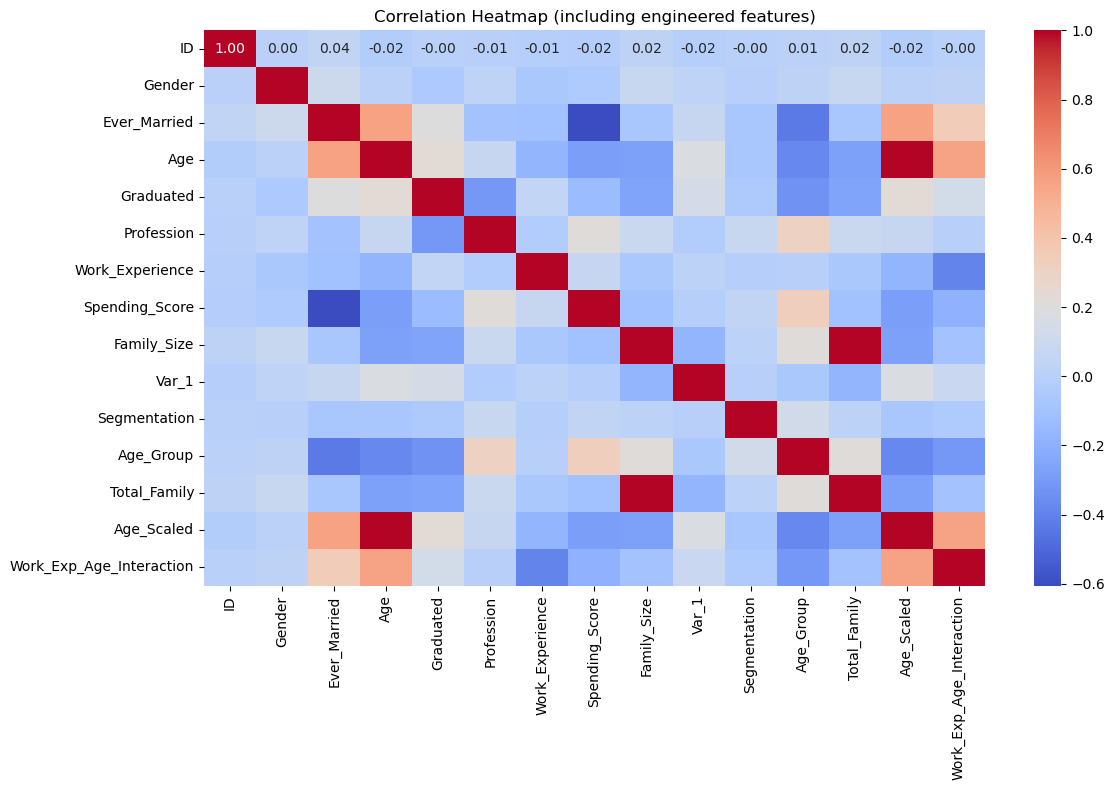

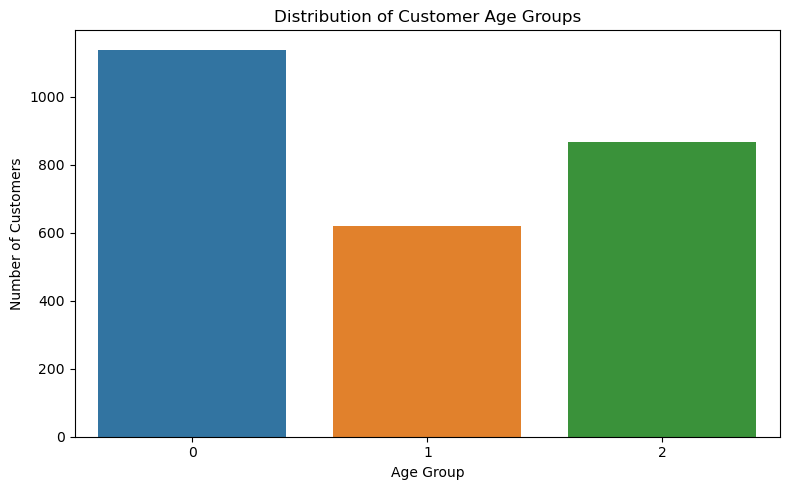

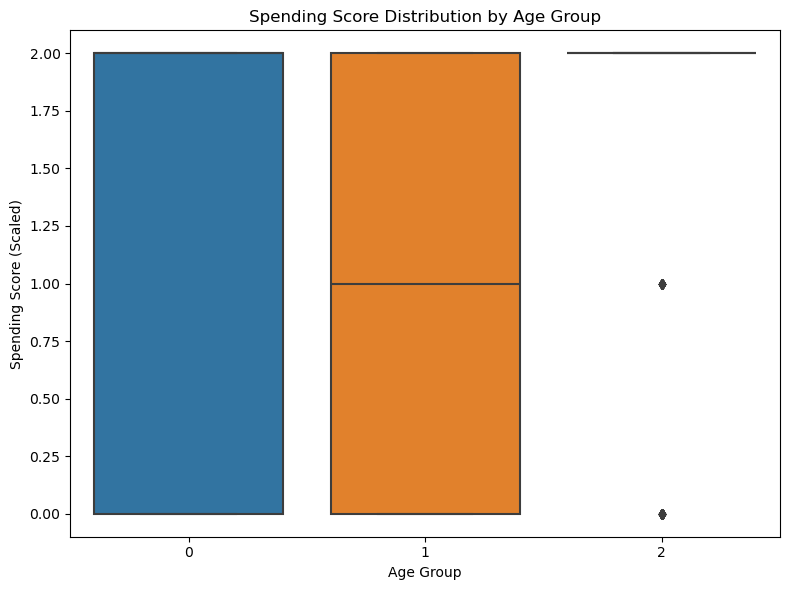

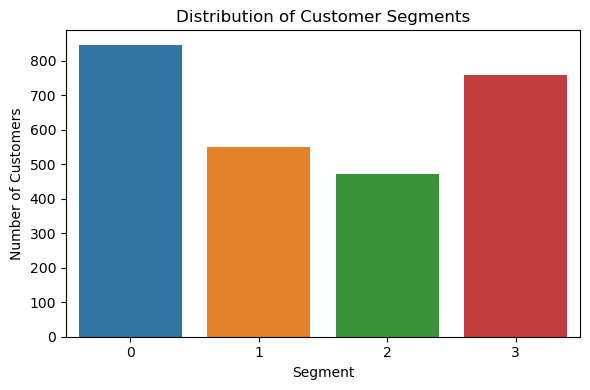

In [9]:
# Step 9: Exploratory Data Analysis (EDA)
print("\n📊 Exploratory Data Analysis (including new features):")
plt.figure(figsize=(12, 8))
sns.heatmap(customer_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (including engineered features)")
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_df, x='Age_Group')
plt.title("Distribution of Customer Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_df, x='Age_Group', y='Spending_Score')
plt.title("Spending Score Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Spending Score (Scaled)")
plt.tight_layout()
plt.show()
if 'Segmentation' in customer_df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=customer_df, x='Segmentation')
    plt.title("Distribution of Customer Segments")
    plt.xlabel("Segment")
    plt.ylabel("Number of Customers")
    plt.tight_layout()
    plt.show()

In [10]:
# Step 10: Save the Final Cleaned Dataset
output_path = "cleaned_customer_segmentation_engineered.csv"
customer_df.to_csv(output_path, index=False)
print(f"\n💾 Cleaned dataset with engineered features saved to: {output_path}")


💾 Cleaned dataset with engineered features saved to: cleaned_customer_segmentation_engineered.csv
